In [1]:
import os
import matplotlib.pyplot as plt
import PIL.Image as Image
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


In [2]:
dir = '../image_generator/AD075CA_STDF0685/'
file_names = os.listdir(dir)
file_names.sort()
print(file_names)
print('The number of fruit images: ', len(file_names))

['1.png', '10.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png', '107.png', '108.png', '109.png', '11.png', '110.png', '111.png', '112.png', '113.png', '114.png', '115.png', '116.png', '117.png', '118.png', '119.png', '12.png', '120.png', '121.png', '122.png', '123.png', '124.png', '125.png', '126.png', '127.png', '128.png', '129.png', '13.png', '130.png', '131.png', '132.png', '133.png', '134.png', '135.png', '136.png', '137.png', '138.png', '139.png', '14.png', '140.png', '141.png', '142.png', '143.png', '144.png', '145.png', '146.png', '147.png', '148.png', '149.png', '15.png', '150.png', '151.png', '152.png', '153.png', '154.png', '155.png', '156.png', '157.png', '158.png', '159.png', '16.png', '160.png', '161.png', '162.png', '163.png', '164.png', '165.png', '166.png', '167.png', '168.png', '169.png', '17.png', '170.png', '171.png', '172.png', '173.png', '174.png', '175.png', '176.png', '177.png', '178.png', '179.png', '18.png', '180.png', '181.png'

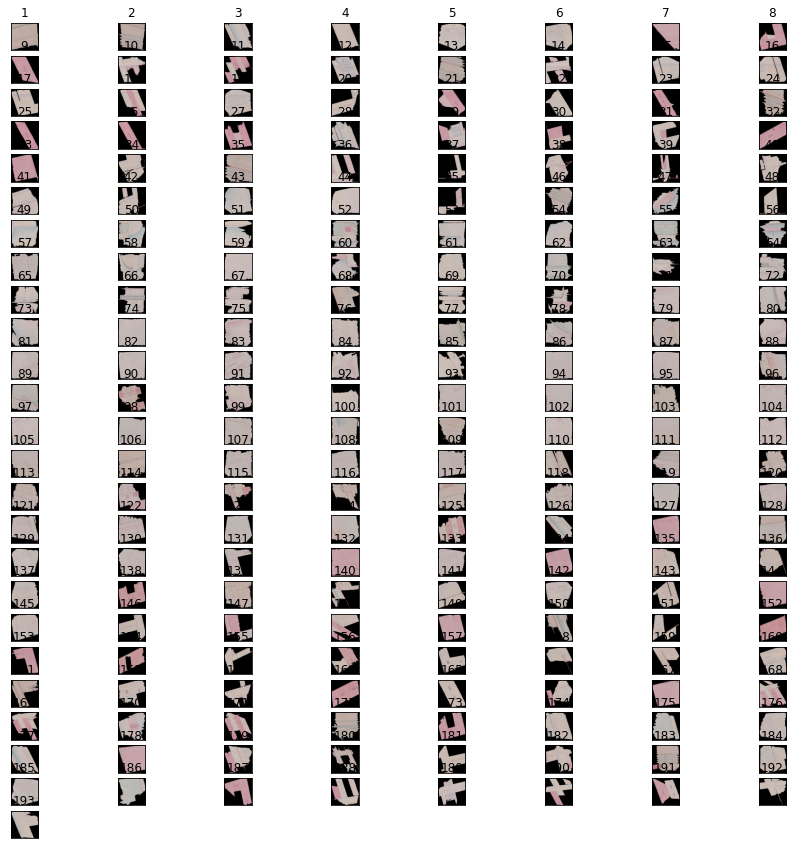

In [3]:
c = 8
r = len(file_names) // c + 1
plt.figure(figsize=(15,15))
for i, file_name in enumerate(file_names):
    abs_file_path = dir + file_name
    img = image.load_img(abs_file_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x.astype('float32') / 255
    plt.subplot(r, c, i+1)
    plt.title(i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x)

In [4]:
# consine similarity
def cosine_similarity(ratings):
    sim = ratings.dot(ratings.T)
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [7]:
	y_test = []
	x_test = []
	for file_name in file_names:
		abs_file_path = dir + file_name
		img = image.load_img(abs_file_path, target_size=(224, 224))
		y_test.append(int(file_name.split('.')[0]))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		if len(x_test) > 0:
			x_test = np.concatenate((x_test, x))
		else:
			x_test = x

In [8]:
y_test

[1,
 10,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 11,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 12,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 13,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 14,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 15,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 16,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 17,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 18,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 19,
 190,
 191,
 192,
 193,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 8,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 9,


In [9]:
x_test.shape

(193, 224, 224, 3)

In [10]:
print(y_test)

[1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [11]:
# convert input to VGG format
x_test = preprocess_input(x_test)

# include_top=False: exclude top(last) 3 fully-connected layers. get features dim=(1,7,7,512)
model = VGG16(weights='imagenet', include_top=False)

# use VGG to extract features
features = model.predict(x_test)

In [12]:
x_test.shape

(193, 224, 224, 3)

In [13]:
features.shape

(193, 7, 7, 512)

In [24]:
# flatten as one dimension
features_compress = features.reshape(len(y_test), 7 * 7 * 512)

# compute consine similarity
cos_sim = cosine_similarity(features_compress)

# random choose 5 samples to test
inputNos = np.random.choice(len(y_test), 10, replace=False)

input: '105', recommend: [2, 3]
input: '45', recommend: [14, 12]
input: '101', recommend: [190, 187]
input: '112', recommend: [26, 19]
input: '185', recommend: [92, 52]
input: '73', recommend: [165, 176]
input: '165', recommend: [74, 65]
input: '191', recommend: [98, 67]
input: '122', recommend: [35, 31]
input: '70', recommend: [162, 188]


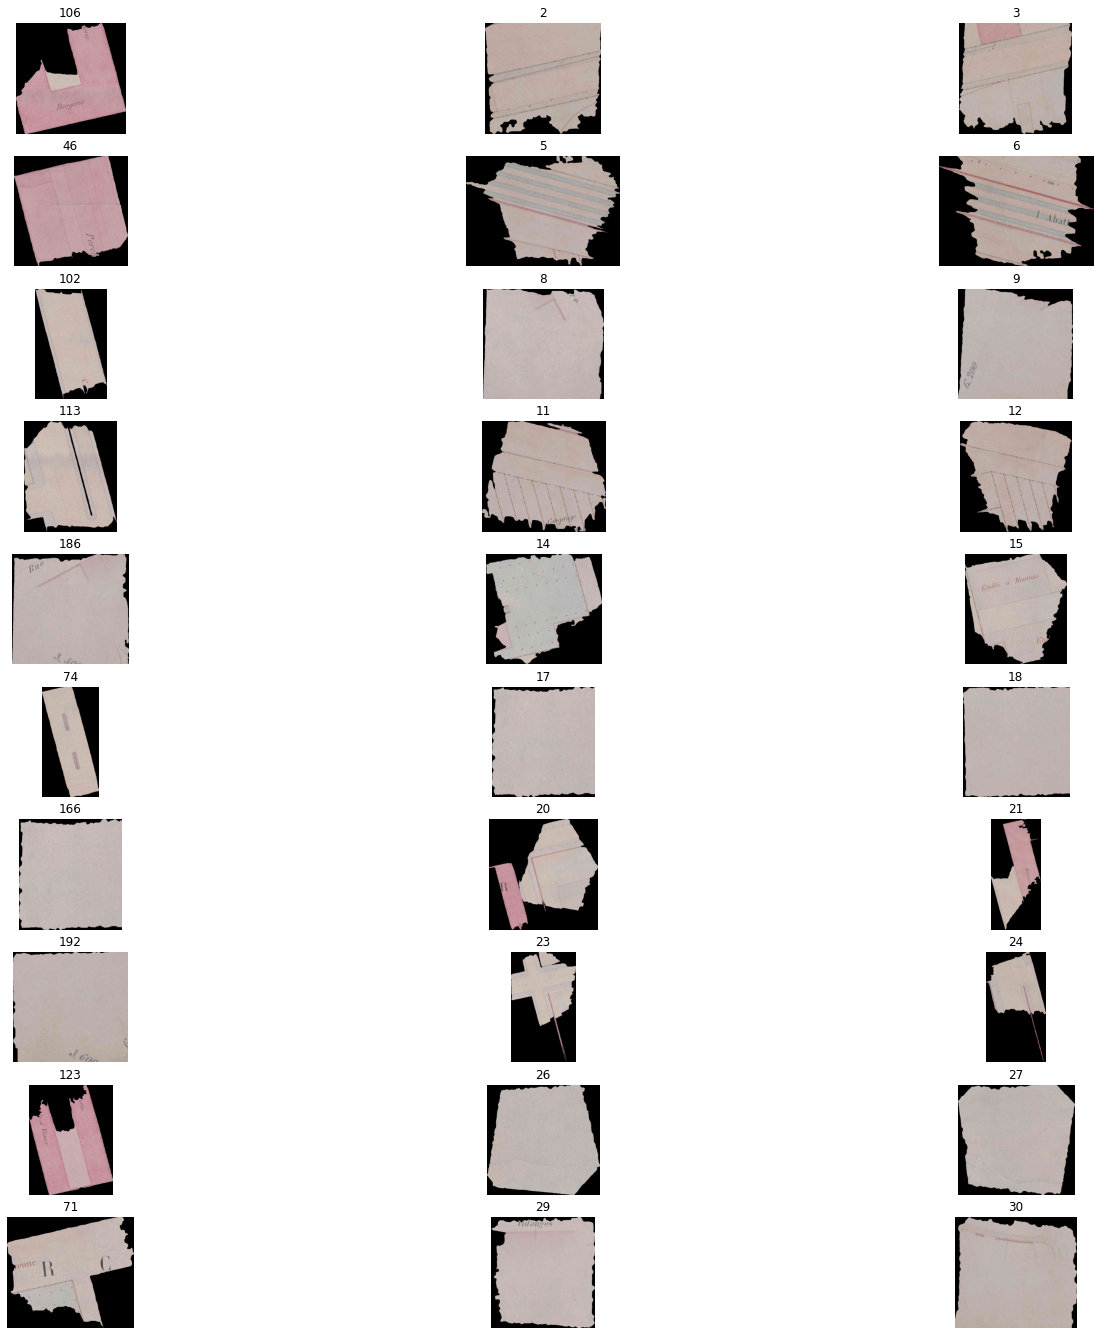

In [28]:
fig = plt.figure(figsize=(24, 24))
index = 1
for inputNo in inputNos:
    # select two best similar images
    top = np.argsort(-cos_sim[inputNo], axis=0)[0:2]
    recommend = [y_test[i] for i in top]
    output = 'input: \'{}\', recommend: {}'.format(inputNo, recommend)
    print(output)
    input_path = dir + str(inputNo) + '.png'
    fig.add_subplot(10, 3, index)

    image_input = np.array(Image.open(input_path))

    plt.title(str(inputNo+1))
    plt.axis('off')
    plt.imshow(image_input)
    index += 1

    for re in recommend:
        recommend_path = dir + str(re) + '.png'
        image_output = np.array(Image.open(recommend_path))

        fig.add_subplot(10, 3, index)
        plt.title(index)
        plt.axis('off')
        plt.imshow(image_output)
        index += 1
plt.show()
